Submission Details: This homework problem set consists of 3 problems. Use the PDF as a reference for the questions. All solutions (in Python Notebook, **LastName_FirstName_Assignment3.ipynb**) should be submitted via CANVAS before the deadline (**17 Mar 2023 at 5:00 PM**).

*Best Coding Practices:*


*   Having Proper Comments and Documentation
*   Proper Naming of Variables, Classes, Functions and Modules


# Question 1 (Reddit Web Scraping - 6 points):
Complete the following tasks or answer the following questions.

Write a Python script using PRAW to scrape the top 500 comments from a specific post in the subreddit "r/socialscience" and store them in a CSV file. The CSV file should contain the comment ID, author name, comment text, and the number of upvotes received by the comment. **(3 points)**

In [12]:
#import packages
!pip install praw
import requests
import pandas as pd
import praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
#passing my reddit details 
reddit = praw.Reddit(client_id="1UVcjLahdL12WrZo0xKmOQ", client_secret=	"ARweQibBBqqThq4MHb-5KkLg-2CrOQ", user_agent="Scrapping - 301") 

In [14]:
#creating a post object via URL
post = reddit.submission(url='https://www.reddit.com/r/socialscience/comments/xeweyf/us_is_becoming_a_developing_country_on_global/')

In [15]:
#NOTE: As discussed on Piazza, I was not able to find a post with more than 500 comments.
#I found a post with 135 comments and my code here is intended to extract the top comments. 

#initialize an empty list to store comment details
comment_details = []

#iterate over all comments and their replies (comments within comments) and extract relevant information
for comment in post.comments:
    comment_details.append([comment.id, comment.ups, comment.body, comment.name])
    for reply in comment.replies:
        comment_details.append([reply.id, reply.ups, reply.body, reply.name])

#convert the comment details list to a pandas DataFrame
comment_details_df = pd.DataFrame(comment_details, columns=['id', 'ups', 'body', 'author'])

#sort the comments and replies by score in descending order
comment_details_df_sorted = comment_details_df.sort_values(by='ups', ascending=False)

#select the top comments and save to CSV
comment_details_df_sorted.head(100).to_csv('top_comments.csv', index=False)

print(comment_details_df)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



         id  ups                                               body  \
0   ioj3p2e   16                                       Not a shock.   
1   iomrqyd   -6  Indeed. \n\nIt isn't shocking that the UN appa...   
2   iokj2c0    6  Lol, we're sliding backwards in the ranks. So ...   
3   ioj8jmf   25  That trickle down economics is gonna kick in ,...   
4   iollezj    8  Don't forget to cut benefits to the poor! \n\n...   
5   iojvqdk    7                        Widen the income gap maybe?   
6   iomawn3   -2  No no what we need is more socialism! That’ll ...   
7   iokp222    4  I feel like "collapsing/failing empire" should...   
8   ioj6s2d    5  They have been influenced by misinformation an...   
9   iojrcib    6  We already know who it is, it's the same peopl...   
10  iomqxap    1  What did they do, read this article or something?   
11  iokokt2    2  This is the best tl;dr I could make, [original...   
12  iokerjn    2                                          [deleted]   
13  io

Write a Python script using PRAW to scrape the top 100 posts from the subreddit "r/askscience" and print their titles, URLs, and scores. **(3 points)**

In [8]:
reddit = praw.Reddit(client_id='Wc3c-_BxjrU0uVOhAlRZsA', client_secret='ziFeetWMoV8ILNOLTr_B_c6c4sxXkA', user_agent='Scraping - QMSS 301')

science_data = reddit.subreddit('askscience')    # Now we have our subreddit data in the name 'gw_sub_data'
# https://www.reddit.com/r/askscience/top/?t=year

In [9]:
import pandas as pd
import numpy as np
top_posts_details = []                          #create an empty list
top_science_posts = science_data.top(limit=100)     #get the top 100 hot posts 
for post in top_science_posts:                    #initiate a for-loop
    top_posts_details.append([post.title, post.score, post.url]) #append each detail to the empty list
top_posts_details = pd.DataFrame(top_posts_details,columns=['title', 'score', 'url']) #convert to dataframe and name the columns
print(top_posts_details)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                                title  score  \
0                   Help us fight for net neutrality!  83382   
1                          Stephen Hawking megathread  65829   
2                                  Black Lives Matter  51925   
3                              A message to our users  39297   
4   Why is it that during winter it's not uncommon...  37674   
..                                                ...    ...   
95  What is the bottom of the Sahara desert like? ...  14921   
96  How does a computer network like HBO's handle ...  14855   
97  Why doesn't modern healthcare protocol include...  14801   
98  If doctors can fit babies with prescription ey...  14787   
99  Numerically there have been more deaths from t...  14712   

                                                  url  
0   https://www.reddit.com/r/askscience/comments/7...  
1   https://www.reddit.com/r/askscience/comments/8...  
2   https://www.reddit.com/r/askscience/comments/g...  
3   htt

# Question 2 (Exploratory Data Analysis on Reddit Data - 7 points): 

Using the RedditData.csv (provided in the lab assignments folder), complete the following tasks.

Load the Reddit Data csv file into a pandas dataframe and extract the column containing the score (i.e. the ratio of likes and dislikes). Generate a histogram of the score distribution and describe the shape of the distribution. **(3 points)**

In [16]:
#import necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [17]:
#load csv file into a pandas dataframe and dropping nulls
data = pd.read_csv('RedditData.csv').dropna()

In [18]:
#extract score column from the DataFrame
score = data['score']

#print column
print(score)

2          0
6        317
7        405
10       222
12         0
        ... 
53181    156
53182    238
53183    228
53185    338
53186     40
Name: score, Length: 24738, dtype: int64


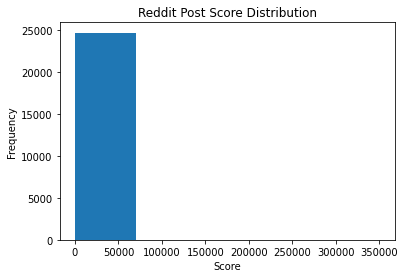

In [25]:
#create a historgram of score column using matplotlib 

#set bin limit to 350000
bin_limit = 350000
#histogram of score distribution with 30 bins
plt.hist(score, bins=5, range=(0, bin_limit))
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Reddit Post Score Distribution')
plt.show()

#The histogram plot shows that the vast majority of Reddit posts have a score of less than 50,000 (right skew). The frequency of posts decreases significantly as the score increases, with very few posts having a score greater than 75,000.
#The distribution suggests it is difficult to achieve a high score on Reddit. 
#The histogram has a very thin tail, meaning an extremely small amount of Reddit posts score more than 75,000. 


Create a scatter plot using the matplotlib library, with the score on the x-axis and the number of comments on the y-axis. Add a trend line to the plot to visualize the relationship between scores and the number of comments and discuss your findings. **(4 points)**

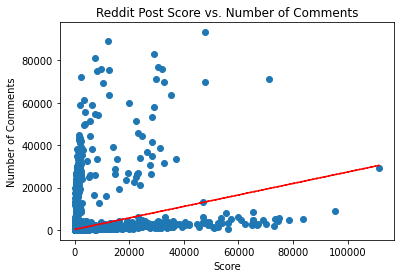

In [26]:
#get the score and number of comments columns from the DataFrame
score = data['score']
comments = data['comms_num']

#create scatter plot
plt.scatter(score, comments)
plt.xlabel('Score')
plt.ylabel('Number of Comments')
plt.title('Reddit Post Score vs. Number of Comments')

#calculate and add the trend line
z = np.polyfit(score, comments, 1)
p = np.poly1d(z)
plt.plot(score, p(score), "r--")

#show the plot
plt.show()

#Based on the scatter plot and the trend line, there is a very weak positive correlation between the post score and the number of comments it receives.
#So as the score of a post increases, the number of comments it receives also tends to increase.
#The trend line shows a moderate slope, indicating that for every increase in score, there is a moderate increase in the number of comments. 
#There are many data points that fall far away from the trend line, meaning there may be other factors that influence the number of comments on a post.

# Question 3 (Exploratory Data Analysis on Twitter Data - 7 points): 

Using TwitterData.csv (provided in the lab assignments folder), complete the following tasks. You will likely need to consult the pandas library documentation.


Create a new dataframe using pandas that only contains the rows where the user's location column contains the word 'USA'. Group the resulting dataframe by state and calculate the total number of retweets for Top 5 states. Visualize the results using any plot. **(4 points)**

In [27]:
#------------------------Helper Code-------------------
import pandas as pd

#load the Twitter Data csv file into a pandas dataframe
twitter_df = pd.read_csv('TwitterData.csv')
#dropping null values
twitter_df.dropna(inplace=True)
#filtering for USA
filtered_df = twitter_df[twitter_df['user_location'].str.contains(', USA')]

filtered_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
57,1338612922600333315,Kris LaGrange,"LI, NYC, NJ, PA, NE, USA",UCOMM Blog aggregates activist news you can us...,2011-01-27 21:42:20,24686,6077,2994,False,2020-12-14 22:32:45,Members of the @teamsters delivered the first ...,"['COVID19Vaccine', 'teamsters', 'UPS', 'COVID1...",Twitter Web App,8,18,False
79,1338572466898100224,AcceGen,"New Jersey, USA",AcceGen developed significant expertise in cel...,2017-08-28 07:03:43,12,63,19,False,2020-12-14 19:52:00,How the #PfizerBioNTech Vaccine Works?\nThis a...,"['PfizerBioNTech', 'COVID19']",Twitter Web App,0,0,False
84,1338565957866778624,Genevieve Reaume,"Oregon, USA",Emmy-award winning @KATUnews reporter • shooti...,2015-06-22 18:41:01,4276,1704,5877,True,2020-12-14 19:26:08,"The state is supposed to get 35,100 doses tota...",['PfizerBioNTech'],Twitter Web App,0,0,False
86,1338565238082265089,Genevieve Reaume,"Oregon, USA",Emmy-award winning @KATUnews reporter • shooti...,2015-06-22 18:41:01,4276,1704,5877,True,2020-12-14 19:23:16,#BREAKING - just in from @OHAOregon on #COVID1...,"['BREAKING', 'COVID19', 'vaccine']",Twitter Web App,1,6,False
89,1338557609540894720,Next Shot,"California, USA",Too busy to read news? We got you covered. Nex...,2020-11-13 07:28:48,18,37,38,False,2020-12-14 18:52:57,Canadian PM Justin Trudeau announced the arriv...,"['BioNTech', 'PfizerBioNTech']",Twitter for Android,0,0,False


In [28]:
#create a new dataframe with only rows where the user's location column contains the word 'USA'
twitter_df = filtered_df[filtered_df['user_location'].str.contains('USA')]

In [48]:
import re

# Define a regular expression to match US state names
state_regex = re.compile(r"\b(alabama|alaska|arizona|arkansas|california|colorado|connecticut|delaware|florida|georgia|hawaii|idaho|illinois|indiana|iowa|kansas|kentucky|louisiana|maine|maryland|massachusetts|michigan|minnesota|mississippi|missouri|montana|nebraska|nevada|new hampshire|new jersey|new mexico|new york|north carolina|north dakota|ohio|oklahoma|oregon|pennsylvania|rhode island|south carolina|south dakota|tennessee|texas|utah|vermont|virginia|washington|west virginia|wisconsin|wyoming)\b")

# Define a function to extract the state from a location string
def extract_state(location):
    location = location.lower()
    match = state_regex.search(location)
    if match:
        return match.group(1)
    else:
        return None

# Apply the extract_state function to the user_location column of the dataframe
filtered_df["state"] = filtered_df["user_location"].apply(extract_state)

# Filter out rows where the state is not found
filtered_df = filtered_df[filtered_df["state"].isin(['alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 'connecticut', 'delaware', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico', 'new york', 'north carolina', 'north dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 'south carolina', 'south dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin', 'wyoming'])]

# Print the resulting dataframe with just the state column
print(filtered_df["state"])


79          new jersey
84              oregon
86              oregon
89          california
165       pennsylvania
              ...     
227607      new jersey
227675      california
227678      california
227987      new jersey
228183         florida
Name: state, Length: 3425, dtype: object


In [50]:
# Sort the dataframe by user_location and state
sorted_filtered_df = filtered_df.sort_values(by=['user_location', 'state'])

# Print the resulting dataframe with the user_location and state columns
print(sorted_filtered_df[['user_location', 'state']])

                         user_location       state
218739         #FreeState Florida, USA     florida
19412         (314) STL, Missouri, USA    missouri
157141  ..................Texas, USA..       texas
157142  ..................Texas, USA..       texas
157143  ..................Texas, USA..       texas
...                                ...         ...
206469                    Wyoming, USA     wyoming
207025    Yavapai County, Arizona, USA     arizona
201784  rural Northern California, USA  california
224862  rural Northern California, USA  california
51807               west Michigan, USA    michigan

[3425 rows x 2 columns]


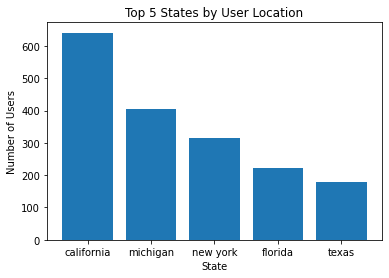

In [53]:
import matplotlib.pyplot as plt

#counts by state in terms of user location in the filtered_df dataframe
state_counts = filtered_df["state"].value_counts().head(5)

#bar chart of the state counts
plt.bar(state_counts.index, state_counts.values)

#labels 
plt.xlabel("State")
plt.ylabel("Number of Users")
plt.title("Top 5 States by User Location")

#display
plt.show()

Using the pandas library, group the Twitter Data dataframe by "source" column and calculate the median, mean, and standard deviation of the number of followers. **(3 points)**

In [33]:
#------------------------Helper Code-------------------
import pandas as pd

#load csv file into a pandas dataframe
twitter_df = pd.read_csv('TwitterData.csv').dropna()

In [34]:
#filtering
searchfor = ["Twitter for Android" , "Twitter Web App" , "Twitter for iPhone"]
twitter_df = twitter_df[twitter_df.source.str.contains('|'.join(searchfor))]

In [41]:
#group by source and followers and calculate central tendencies 

#mean
filtered_df.groupby('source')['user_followers'].mean()


source
Blog2Social APP                 167.333333
Buffer                       209234.531915
Foursquare                      349.000000
Hootsuite Inc.                 2022.863636
IFTTT                          2004.166667
IndiaPost                       648.857143
Instagram                       544.421875
LinkedIn                       3378.200000
OptionsMaxPain_Post            3427.000000
OptionsProOI                   2624.000000
OptionsProVol                  1680.000000
PLANOLY                       14284.000000
Paper.li                       1374.000000
SEMrush Social Media Tool        51.000000
SmartNews | スマートニュース            305.000000
SocialFlow                     7835.000000
SocialJoey                      466.000000
Spreaker                       9363.000000
Sprout Social                  3278.400000
StockTwits Web                  251.666667
Talon Android                  2592.000000
Tumblr                          281.000000
Tweepsmap                     46802.000000
Twee

In [ ]:
#median
filtered_df.groupby('source')['user_followers'].median()

In [ ]:
#std
filtered_df.groupby('source')['user_followers'].std()